In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Our first dataset is the "tips" dataset. This dataset is used to train a model to predict tip based on total bill, whether the person is smoker, male or female, day, size of table and food of the day.

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Our second dataset is the famous "titanic" dataset. This dataset is used to train a model to predict whether a passenger survived.

In [3]:
titanic= sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1. Box plot

A box plot (or box-and-whisker plot) is a graph that presents information in the from of five-number summary. The function boxplot draws a box plot. It shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be "outliers" using a method that is a function of the inter-quartile range.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

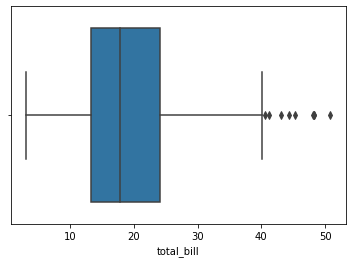

In [4]:
sns.boxplot(tips.total_bill)

If "notch" is `True`, the function boxplot will produce a notched box plot. The notches represent the confidence interval (CI) around the median.

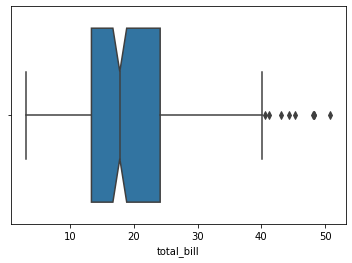

In [5]:
sns.boxplot(tips.total_bill, notch=True)

The "whis" parameter is used to set the proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

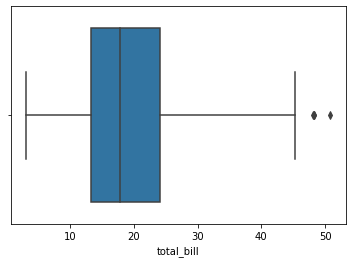

In [6]:
sns.boxplot(tips.total_bill, whis=2)

When we don't pass x and y, the function will plot box plot for every numeric variable. 

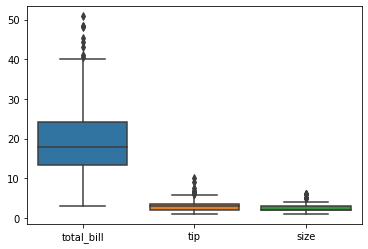

In [7]:
sns.boxplot(data=tips, orient='v')

We can show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

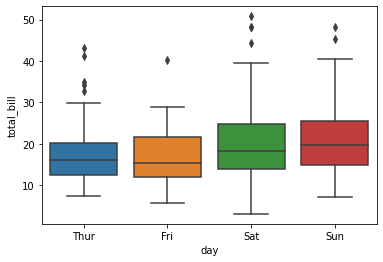

In [8]:
sns.boxplot(x="day", y="total_bill", data=tips)

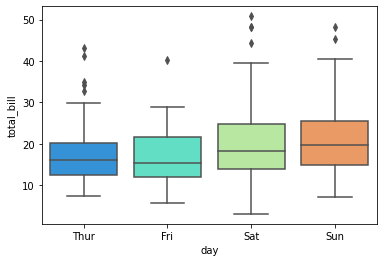

In [9]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

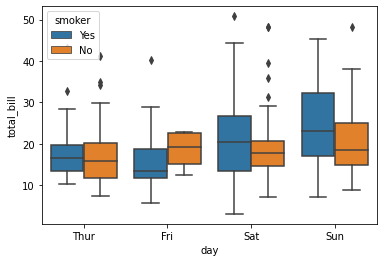

In [10]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

## 2. Strip and Swarm Plot

### Strip plot

Strip plot is a scatter plot where one variable is categorical.

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.    

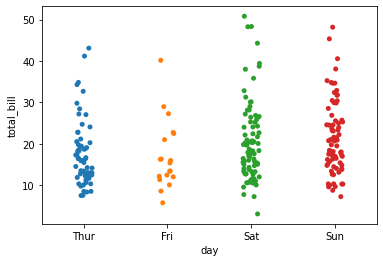

In [11]:
sns.stripplot(x="day", y="total_bill", data=tips)

Although, the points look scattered a little arround each category, they are in a straight line. By default, stripplot adds some jitter. This can be useful when you have many points and they overlap, so that it is easier to see the distribution. We can specify the amount of jitter or just use ``False`` for no jitter.

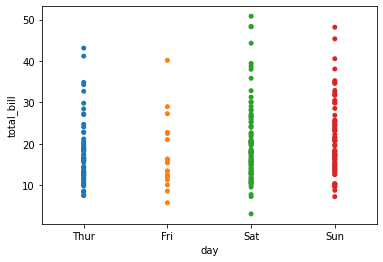

In [12]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)

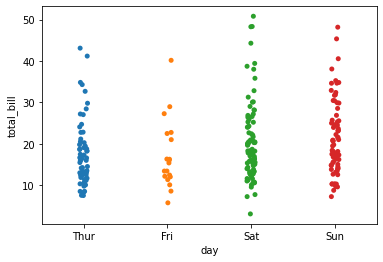

In [13]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.05)

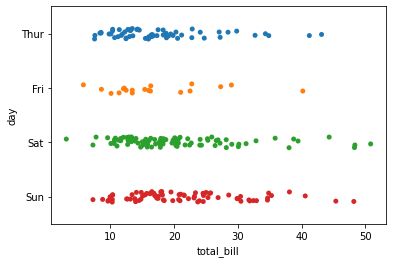

In [14]:
sns.stripplot(x="total_bill", y="day", data=tips)

We can use "hue" to add one more category.

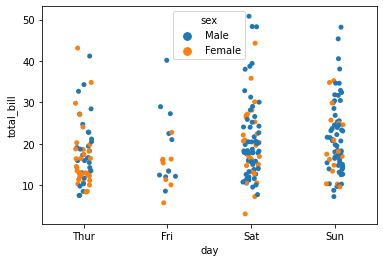

In [15]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips)

When using ``hue`` nesting, setting "dodge" to ``True`` will separate the strips for different hue levels along the categorical axis. Otherwise, the points for each level will be plotted on top of each other.

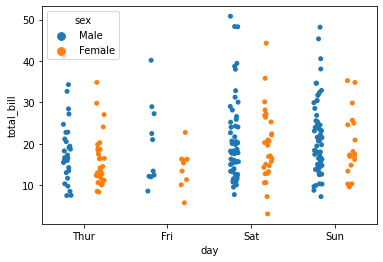

In [16]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, dodge=True)

For small dataset, we can add stripplot or swarm plot on our box plot to show where where data is located. It gives us a more detailed information on density of data at different positions compared to boxplot.

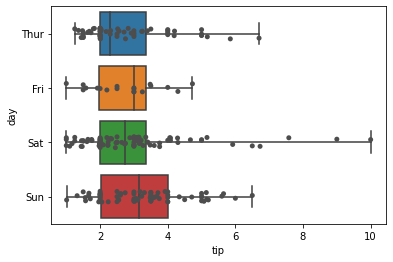

In [17]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, color="0.3")

### Swarm plot

Swarm plot is a categorical scatterplot with non-overlapping points.

This function is similar to :func:`stripplot`, but the points are adjusted (only along the categorical axis) so that they don't overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a "beeswarm".

A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

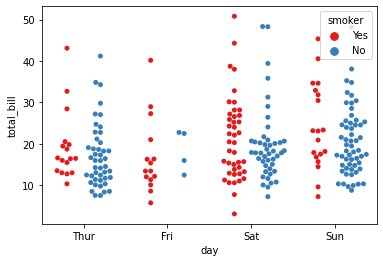

In [18]:
sns.swarmplot(x="day", y="total_bill", hue="smoker",
              data=tips, palette="Set1", dodge=True)

For small dataset, we can add stripplot or swarm plot on our box plot to show where where data is located. It gives us a more detailed information on density of data at different positions compared to boxplot.

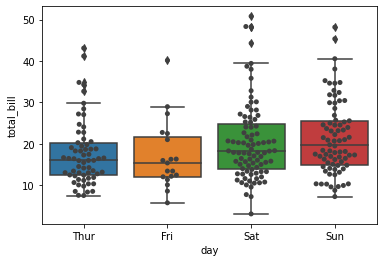

In [19]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")

## 3. Violin plot

Violin plot a combination of boxplot and kernel density estimate. A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual data points, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

Representation of the datapoints in the violin interior is determined by "inner" parameter. If ``box``, default value, draws a miniature boxplot. If ``quartiles``, draws the quartiles of the distribution.  If ``point`` or ``stick``, shows each underlying datapoint. Using ``None`` will draw unadorned violins.

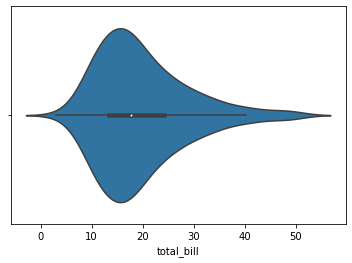

In [20]:
sns.violinplot(tips.total_bill, inner="box")

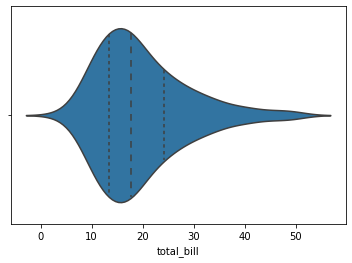

In [21]:
sns.violinplot(tips.total_bill, inner="quartile")

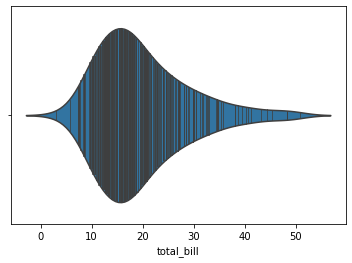

In [22]:
sns.violinplot(tips.total_bill, inner="stick")

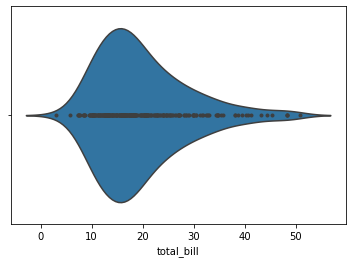

In [23]:
sns.violinplot(tips.total_bill, inner="points")

The "scale" parameter is used to pass the method to be used to scale the width of each violin. If ``area``, each violin will have the same area. If ``count``, the width of the violins will be scaled by the number of observations in that bin. If ``width``, each violin will have the same width.

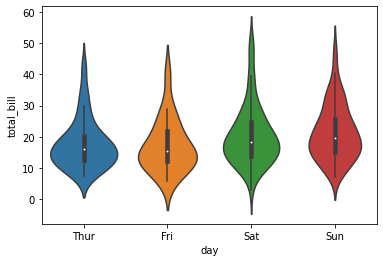

In [24]:
sns.violinplot(x="day", y="total_bill", data=tips, scale="area")

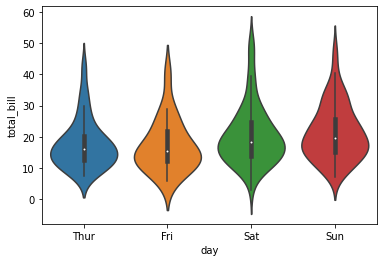

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips, scale="width")

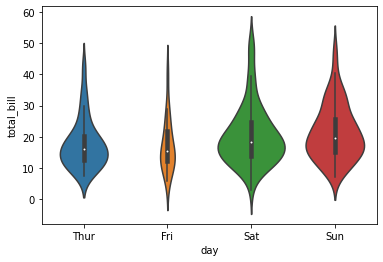

In [26]:
sns.violinplot(x="day", y="total_bill", data=tips, scale="count")

We again have "hue" parameter.

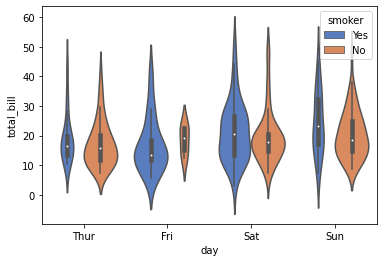

In [27]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
               data=tips, palette="muted", scale="count")

When using hue nesting with a variable that takes two levels, setting ``split`` to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

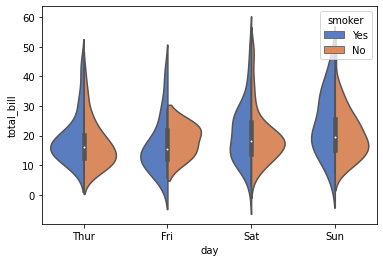

In [28]:
sns.violinplot(x="day", y="total_bill", hue="smoker",
               data=tips, palette="muted", split=True)

## 4. Boxen plot

Boxen plot is an enhanced box plot for larger datasets. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end. This style of plot was originally named a "letter value" plot because it shows a large number of quantiles that are defined as "letter values". For a more extensive explanation, you can read the paper that introduced the plot:

https://vita.had.co.nz/papers/letter-value-plot.html

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

Box plot gives us 25th percentile, also known as the first quartile (Q1), the 50th percentile, also known as the median or second quartile (Q2), and the 75th percentile, also known as the third quartile (Q3). Boxen plot goes further in each direction. After 75th (100-100/4) percentile, we have 87.5th (100-100/8) percentile, 93.75th (100-100/16) percentile, 96.875th (100-100/32) percentile and so on. Before 25th (100/4) percentile, we have 12.5th (100/8) percentile, 6.25th (100/16) percentile, 3.125th (100/32) percentile and so on.

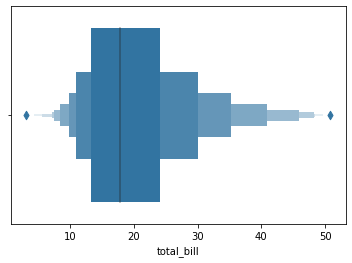

In [29]:
sns.boxenplot(x=tips.total_bill)

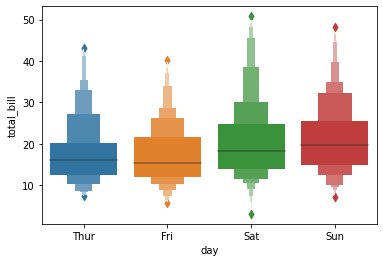

In [30]:
sns.boxenplot(x="day", y="total_bill", data=tips)

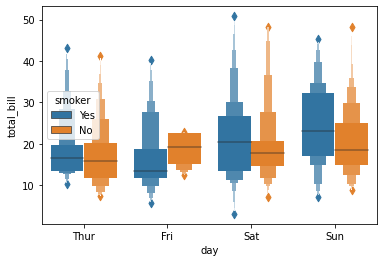

In [31]:
sns.boxenplot(x="day", y="total_bill",
              hue="smoker", data=tips)

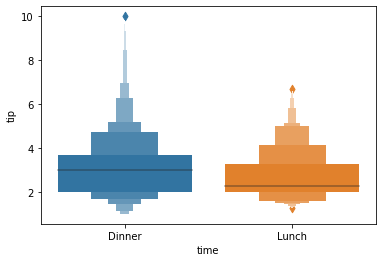

In [32]:
sns.boxenplot(x="time", y="tip", data=tips,
              order=["Dinner", "Lunch"])

## 5. Cat plot

The catplot function provides access to several functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The ``kind`` parameter selects the underlying function to use:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- :func:`boxplot` (with ``kind="box"``)
- :func:`violinplot` (with ``kind="violin"``)
- :func:`boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- :func:`pointplot` (with ``kind="point"``)
- :func:`barplot` (with ``kind="bar"``)
- :func:`countplot` (with ``kind="count"``)

Extra keyword arguments are passed to the underlying function.

Note that unlike when using the axes-level functions directly, data must be passed in a long-form DataFrame with variables specified by passing strings to ``x``, ``y``, ``hue``, etc.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, ... n) on the relevant axis, even when the data has a numeric or date type.

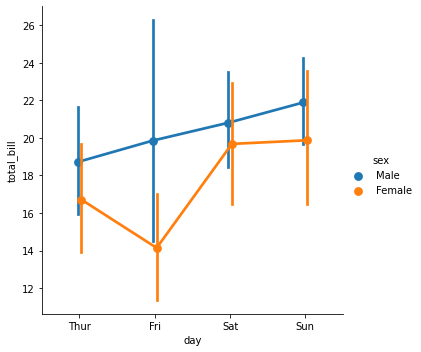

In [33]:
sns.catplot(x="day", y="total_bill", hue="sex",
               data=tips, dodge=True, kind="point")

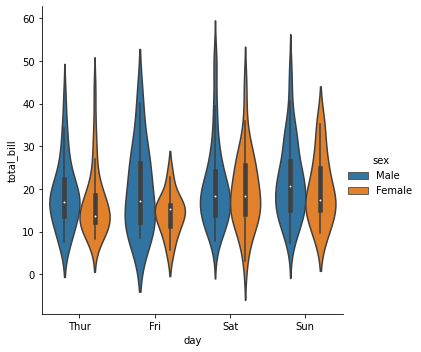

In [34]:
sns.catplot(x="day", y="total_bill", hue="sex",
               data=tips, kind="violin", scale="width")

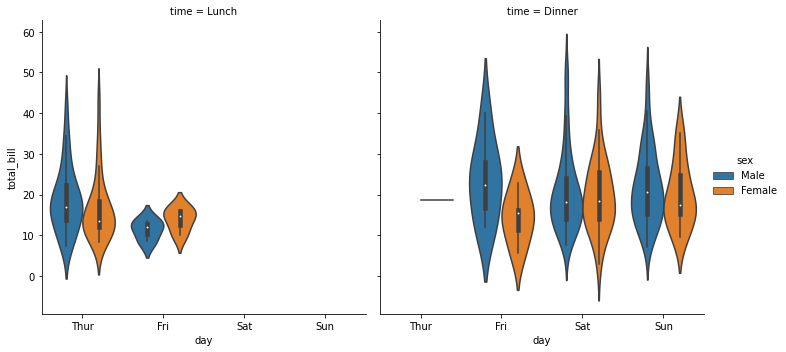

In [35]:
sns.catplot(x="day", y="total_bill", hue="sex",
            data=tips, kind="violin", scale="width",
            col="time")

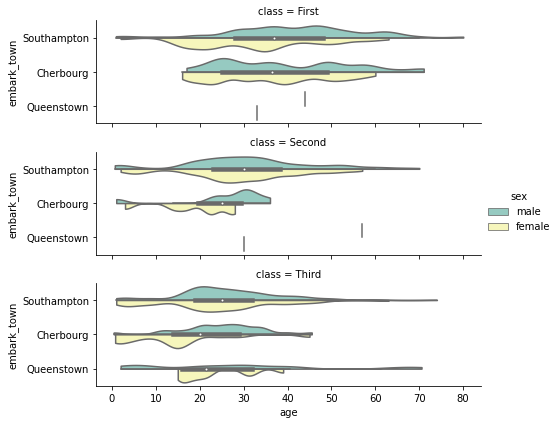

In [36]:
sns.catplot(x="age", y="embark_town", hue="sex", row="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=2, aspect=3.5, palette="Set3",
            kind="violin", split=True, cut=0, bw=.2)

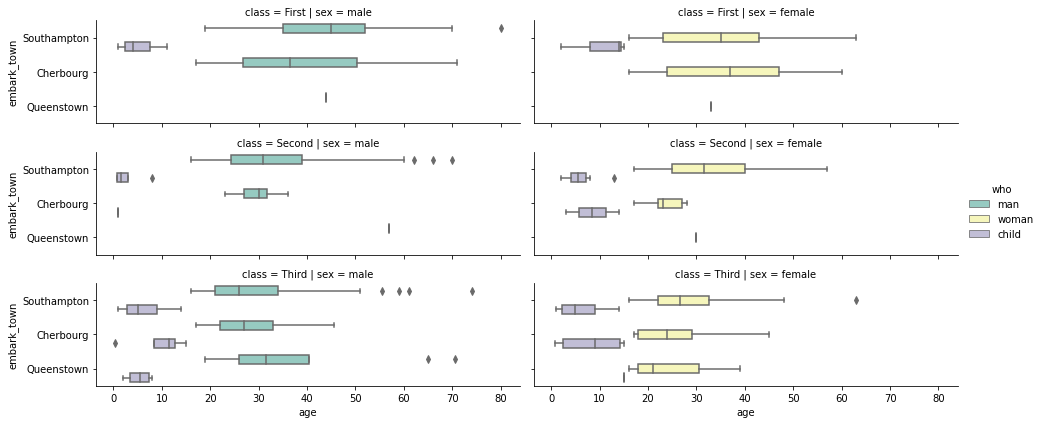

In [37]:
sns.catplot(x="age", y="embark_town", hue="who",
            row="class", col="sex", kind="box",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=2, aspect=3.4, palette="Set3")